# load main packages


In [1]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(readr)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# load tables

In [2]:
daily_activity <- read_csv(paste0("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv"))

sleep_data <- read_csv(paste0("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv"))

heart_rate <- read_csv(paste0("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv"))

weight_data <- read_csv(paste0("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv"))

daily_calories <- read_csv(paste0("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv"))

head(daily_activity)

head(sleep_data)

head(heart_rate)

head(weight_data)

head(daily_calories)


Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2483658 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Time
dbl (2): Id, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


Id,ActivityDay,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728


# cleaning data
# check duplicated rows on every table

In [3]:
#check duplicated rows on every table
duplicated_rows_daily_activity <- daily_activity[duplicated(daily_activity), ]
if (nrow(duplicated_rows_daily_activity) > 0) {
  print("Duplicate rows found in daily_activity table:")
  print(duplicated_rows_daily_activity)
} else {
  print("No duplicate rows found in daily_activity table.")
}

duplicated_rows_sleep_data <- sleep_data[duplicated(sleep_data), ]
if (nrow(duplicated_rows_sleep_data) > 0) {
  print("Duplicate rows found in sleep_data table:")
  print(duplicated_rows_sleep_data)
} else {
  print("No duplicate rows found in daily_activity table.")
}

[1] "No duplicate rows found in daily_activity table."
[1] "Duplicate rows found in sleep_data table:"
# A tibble: 3 × 5
          Id SleepDay        TotalSleepRecords TotalMinutesAsleep TotalTimeInBed
       <dbl> <chr>                       <dbl>              <dbl>          <dbl>
1 4388161847 5/5/2016 12:00…                 1                471            495
2 4702921684 5/7/2016 12:00…                 1                520            543
3 8378563200 4/25/2016 12:0…                 1                388            402


**after finding some duplicates: Remove duplicates from a dataframe using unique()**

In [4]:
sleep_data <- unique(sleep_data)

**another way to remove duplicates is by using dyplyr function called distinct
sleep_data <- distinct(sleep_data)**


In [5]:
duplicated_rows_heart_rate <- heart_rate[duplicated(heart_rate), ]
if (nrow(duplicated_rows_heart_rate) > 0) {
  print("Duplicate rows found in heart_rate table:")
  print(duplicated_rows_heart_rate)
} else {
  print("No duplicate rows found in heart_rate table.")
}

duplicated_rows_weight_data <- weight_data[duplicated(weight_data), ]
if (nrow(duplicated_rows_weight_data) > 0) {
  print("Duplicate rows found in weight_data table:")
  print(duplicated_rows_weight_data)
} else {
  print("No duplicate rows found in weight_data table.")
}

duplicated_rows_daily_calories <- daily_calories[duplicated(daily_calories), ]
if (nrow(duplicated_rows_daily_activity) > 0) {
  print("Duplicate rows found in daily_calories table:")
  print(duplicated_rows_daily_calories)
} else {
  print("No duplicate rows found in daily_calories table.")
    }


[1] "No duplicate rows found in heart_rate table."
[1] "No duplicate rows found in weight_data table."
[1] "No duplicate rows found in daily_calories table."


**remove spaces and blanks and check if there is any changes**

In [6]:
# Create a copy of the original dataframe
original_daily_activity <- daily_activity

# Apply trimws to all string columns in the dataframe
cleaned_daily_activity <- daily_activity %>%
  mutate_if(is.character, trimws)

# Check if there is any change in the dataframe
if (identical(original_daily_activity, cleaned_daily_activity)) {
  print("No change occurred after applying trimws.")
} else {
  print("Changes occurred after applying trimws.")
}

#if there is changes occurred
daily_activity <- cleaned_daily_activity


[1] "Changes occurred after applying trimws."


In [7]:


original_sleep_data <- sleep_data

# Apply trimws to all string columns in the dataframe
cleaned_sleep_data <- sleep_data %>%
  mutate_if(is.character, trimws)

# Check if there is any change in the dataframe
if (identical(original_sleep_data, cleaned_sleep_data)) {
  print("No change occurred after applying trimws.")
} else {
  print("Changes occurred after applying trimws.")
}

#if there is changes applied
sleep_data <- cleaned_sleep_data


[1] "No change occurred after applying trimws."


In [8]:

# Create a copy of the original dataframe
original_heart_rate <- heart_rate

# Apply trimws to all string columns in the dataframe
cleaned_heart_rate <- heart_rate %>%
  mutate_if(is.character, trimws)

# Check if there is any change in the dataframe
if (identical(original_heart_rate, cleaned_heart_rate)) {
  print("No change occurred after applying trimws.")
} else {
  print("Changes occurred after applying trimws.")
}

#if there is changes occurred
heart_rate <- cleaned_heart_rate


[1] "Changes occurred after applying trimws."


In [9]:

#weight_data

# Create a copy of the original dataframe
original_weight_data <- weight_data

# Apply trimws to all string columns in the dataframe
cleaned_weight_data <- weight_data %>%
  mutate_if(is.character, trimws)

# Check if there is any change in the dataframe
if (identical(original_weight_data, cleaned_weight_data)) {
  print("No change occurred after applying trimws.")
} else {
  print("Changes occurred after applying trimws.")
}

#if there is changes occurred
weight_data <- cleaned_weight_data

[1] "Changes occurred after applying trimws."


In [10]:
#daily_calories

# Create a copy of the original dataframe
original_daily_calories <- daily_calories

# Apply trimws to all string columns in the dataframe
cleaned_daily_calories <- daily_calories %>%
  mutate_if(is.character, trimws)

# Check if there is any change in the dataframe
if (identical(original_daily_calories, cleaned_daily_calories)) {
  print("No change occurred after applying trimws.")
} else {
  print("Changes occurred after applying trimws.")
}

#if there is changes occurred
daily_calories <- cleaned_daily_calories

[1] "Changes occurred after applying trimws."


**we noticed that there were spaces only in the sleep_data**

# check for null values


In [11]:
has_null <- any(is.na(daily_activity))

if (has_null) {
  print("At least one column contains null values.")
} else {
  print("No column contains null values.")
}

[1] "No column contains null values."


In [12]:
has_null <- any(is.na(sleep_data))

if (has_null) {
  print("At least one column contains null values.")
} else {
  print("No column contains null values.")
}

[1] "No column contains null values."


In [13]:
has_null <- any(is.na(heart_rate))

if (has_null) {
  print("At least one column contains null values.")
} else {
  print("No column contains null values.")
}

[1] "No column contains null values."


In [14]:
has_null <- any(is.na(weight_data))

if (has_null) {
  print("At least one column contains null values.")
} else {
  print("No column contains null values.")
}

[1] "At least one column contains null values."


In [15]:
has_null <- any(is.na(daily_calories))

if (has_null) {
  print("At least one column contains null values.")
} else {
  print("No column contains null values.")
}


[1] "No column contains null values."


we find out that at least one column contain null value only in the weight dataframenow we can deal with null values in multiple ways:
- delete it
- fill it manually
- fill it with the median value of that column

In [16]:

#dealing with the null values

columns_with_null <- colSums(is.na(weight_data)) > 0

# Get the names of columns with null values
columns_with_null_names <- names(columns_with_null)[columns_with_null]

if (length(columns_with_null_names) > 0) {
  print("Columns with null values:")
  print(columns_with_null_names)
} else {
  print("No columns have null values.")
}

# get rows within fat column that contain null values
rows_with_null <- which(is.na(weight_data$Fat))

# Print the row numbers with null values
print(rows_with_null)

#replace null values within weight dataframe in fat column with the median value of that column
# Calculate the median value of the "fat" column
median_fat <- median(weight_data$Fat, na.rm = TRUE)
print(median_fat)

# Replace null values in the "fat" column with the median value
weight_data$Fat[is.na(weight_data$Fat)] <- median_fat

[1] "Columns with null values:"
[1] "Fat"
 [1]  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
[26] 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
[51] 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
[1] 23.5


# conditional formatting

check if the heart rate falls into the normal heart rate range

In [17]:
# Calculate the Interquartile Range (IQR) for heart rate and weight
heart_rate_iqr <- IQR(heart_rate$value, na.rm = TRUE)
weight_iqr <- IQR(weight_data$WeightKg, na.rm = TRUE)
print(weight_iqr)

# Define the thresholds for outliers (e.g., 1.5 times the IQR)
heart_rate_threshold <- 1.5 * heart_rate_iqr
weight_threshold <- 2.5 * weight_iqr
print(weight_threshold)

print(quantile(heart_rate$value, 0.25) - heart_rate_threshold )

# Identify outliers for heart rate and weight
heart_rate_outliers <- heart_rate$value < quantile(heart_rate$value, 0.25) - heart_rate_threshold |
  heart_rate$heart_rate > quantile(heart_rate$value, 0.75) + heart_rate_threshold

weight_outliers <- weight_data$WeightKg < quantile(weight_data$WeightKg, 0.25) - weight_threshold |
  weight_data$WeightKg > quantile(weight_data$WeightKg, 0.75) + weight_threshold

# Output results
if (any(heart_rate_outliers)) {
  print("Outliers detected in heart rate column.")
} else {
  print("No outliers detected in heart rate column.")
}

if (any(weight_outliers)) {
  print("Outliers detected in weight column.")
  # Get the indices (row numbers) of rows with outliers
  outlier_rows <- which(weight_outliers)
  print(outlier_rows)
} else {
  print("No outliers detected in weight column.")
}


Warning message:
“Unknown or uninitialised column: `value`.”


[1] 23.65
[1] 59.12499


Warning message:
“Unknown or uninitialised column: `value`.”


25% 
 NA 


Warning message:
“Unknown or uninitialised column: `value`.”
Warning message:
“Unknown or uninitialised column: `value`.”
Warning message:
“Unknown or uninitialised column: `heart_rate`.”
Warning message:
“Unknown or uninitialised column: `value`.”


[1] "No outliers detected in heart rate column."
[1] "No outliers detected in weight column."


# check the consistency between tables
# check the dates

In [18]:
#Convert ActivityDate in daily_activity to Date
daily_activity$ActivityDate <- as.Date(daily_activity$ActivityDate, format = "%m/%d/%Y")

#check the date of the sleep data table
sleep_time <- format(as.POSIXct(sleep_data$SleepDay, format = "%m/%d/%Y %I:%M:%S %p"), "%I:%M:%S %p")

# Check if all values are the same
if (all(sleep_time == "12:00:00 AM")) {
  print("All values in the 'sleep day' column contain '12:00:00 AM'.")
} else {
  print("Not all values in the 'sleep day' column contain '12:00:00 AM'.")
}

#delete the time part from sleepDay column in sleep data table
sleep_data$SleepDay <- sub(" 12:00:00 AM", "", sleep_data$SleepDay)

# Convert Date in weight_data to Date
weight_data$Date <- as.Date(weight_data$Date, format = "%m/%d/%Y")

# Convert Time in heart_rate to Date
heart_rate$Time <- as.Date(heart_rate$Time, format = "%m/%d/%Y %I:%M:%S %p")

# Convert ActivityDay in daily_calories to Date
daily_calories$ActivityDay <- as.Date(daily_calories$ActivityDay, format = "%m/%d/%Y")

[1] "All values in the 'sleep day' column contain '12:00:00 AM'."


# summarize your data

In [19]:

#Summarize daily_activity
daily_activity %>% 
select(TotalSteps, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories) %>%
summary()

#Summarize heart_rate
heart_rate %>%
  select(Value) %>%
  summary()

#Summarize weight_data
weight_data %>% 
  select(WeightKg, WeightPounds, Fat, BMI) %>%
  summary()

#Summarize daily_calories
daily_calories %>% 
  select(Calories) %>%
  summary()

   TotalSteps    VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :    0   Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.: 3790   1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median : 7406   Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 7638   Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.:10727   3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :36019   Max.   :210.00    Max.   :143.00      Max.   :518.0       
 SedentaryMinutes    Calories   
 Min.   :   0.0   Min.   :   0  
 1st Qu.: 729.8   1st Qu.:1828  
 Median :1057.5   Median :2134  
 Mean   : 991.2   Mean   :2304  
 3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :1440.0   Max.   :4900  

     Value       
 Min.   : 36.00  
 1st Qu.: 63.00  
 Median : 73.00  
 Mean   : 77.33  
 3rd Qu.: 88.00  
 Max.   :203.00  

    WeightKg       WeightPounds        Fat            BMI       
 Min.   : 52.60   Min.   :116.0   Min.   :22.0   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:135.4   1st Qu.:23.5   1st Qu.:23.96  
 Median : 62.50   Median :137.8   Median :23.5   Median :24.39  
 Mean   : 72.04   Mean   :158.8   Mean   :23.5   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:187.5   3rd Qu.:23.5   3rd Qu.:25.56  
 Max.   :133.50   Max.   :294.3   Max.   :25.0   Max.   :47.54  

    Calories   
 Min.   :   0  
 1st Qu.:1828  
 Median :2134  
 Mean   :2304  
 3rd Qu.:2793  
 Max.   :4900  

# Merging data


In [20]:
merged_data <- merge(daily_activity, sleep_data, by=c('Id'))
head(merged_data)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/12/2016,1,327,346
2,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/13/2016,2,384,407
3,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/15/2016,1,412,442
4,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/16/2016,2,340,367
5,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/17/2016,1,700,712
6,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/19/2016,1,304,320


# plotting


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


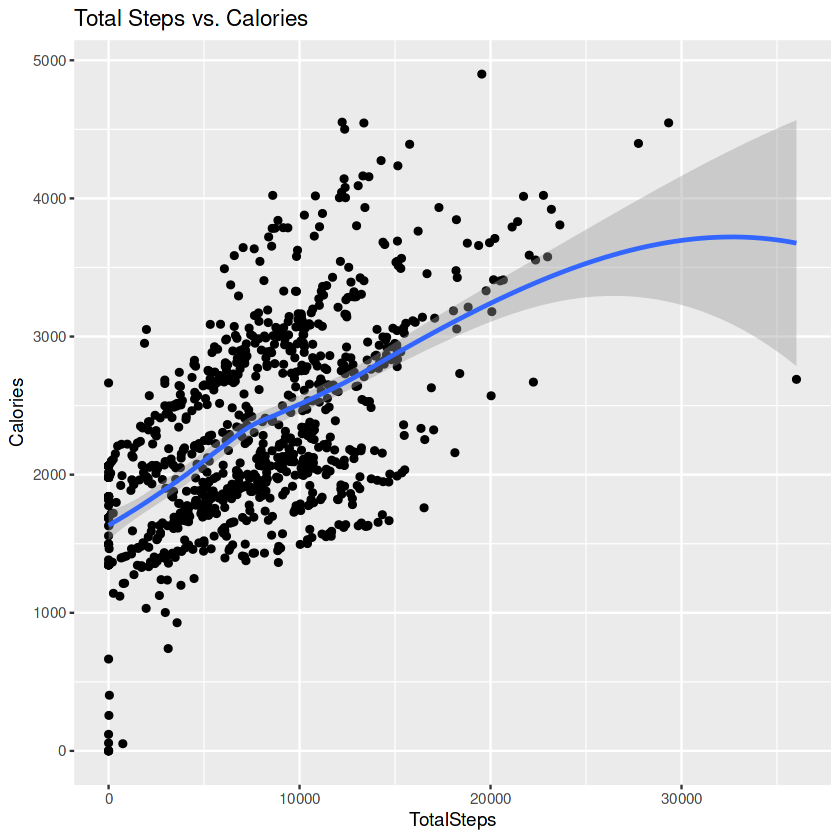

In [21]:
ggplot(data=daily_activity, aes(x=TotalSteps, y=Calories)) + 
geom_point() + geom_smooth() + labs(title="Total Steps vs. Calories")

1. This visualization illustrates the relationship between total steps taken and calories burned.

2. Understanding this relationship can help customers gauge the effectiveness of their physical
 
3. activity in terms of calorie expenditure, motivating them to achieve their fitness goals.

# Visualize trends in daily activity levels over time

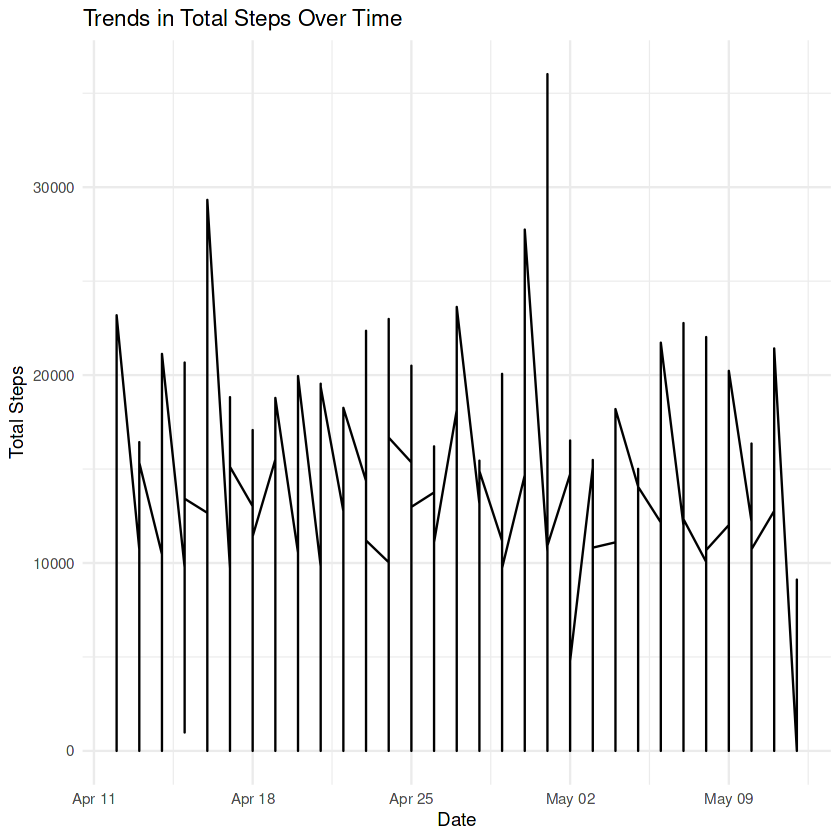

In [22]:
 ggplot(data = daily_activity, aes(x = ActivityDate, y = TotalSteps)) +
  geom_line() +
  labs(title = "Trends in Total Steps Over Time",
       x = "Date",
       y = "Total Steps") +
  theme_minimal() 

1) This visualization shows the trend in total steps taken over time,
2) which reflects smart device usage for tracking physical activity.
3) It helps identify patterns, fluctuations, and overall trends in activity levels

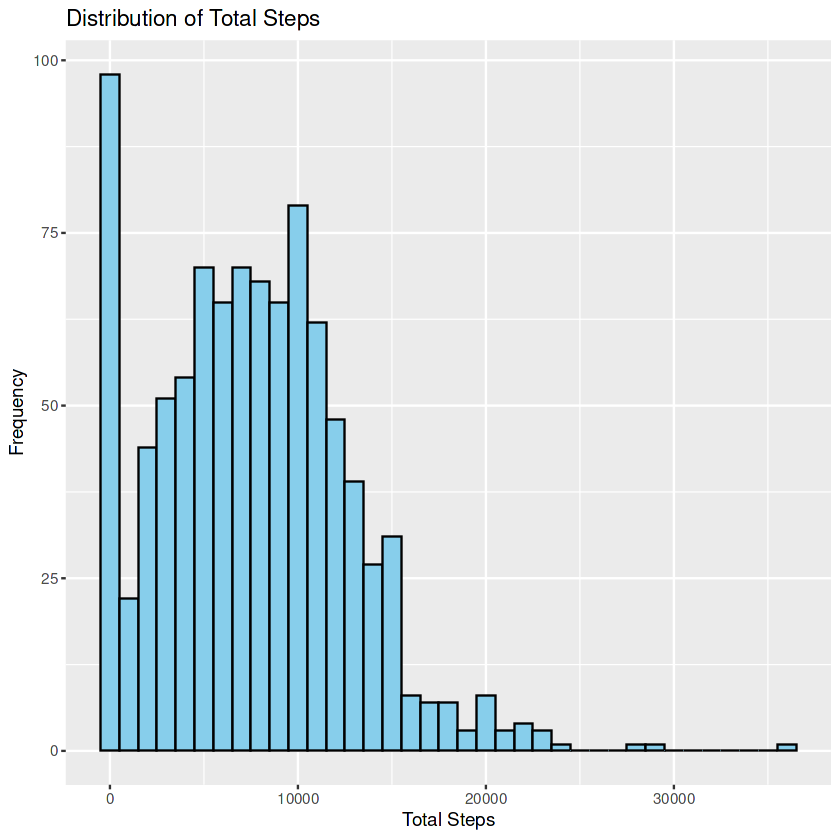

In [23]:
 ggplot(data = daily_activity, aes(x = TotalSteps)) + 
   geom_histogram(binwidth = 1000, fill = "skyblue", color = "black") + 
   labs(title = "Distribution of Total Steps",
        x = "Total Steps",
        y = "Frequency")

1) The histogram of total steps provides insights into user activity levels.
2) Look for common activity levels, peaks indicating popular activity levels,
3) and outliers suggesting extreme behaviors.
4) Understanding these patterns can inform marketing strategies
5) and product development to better serve user needs.

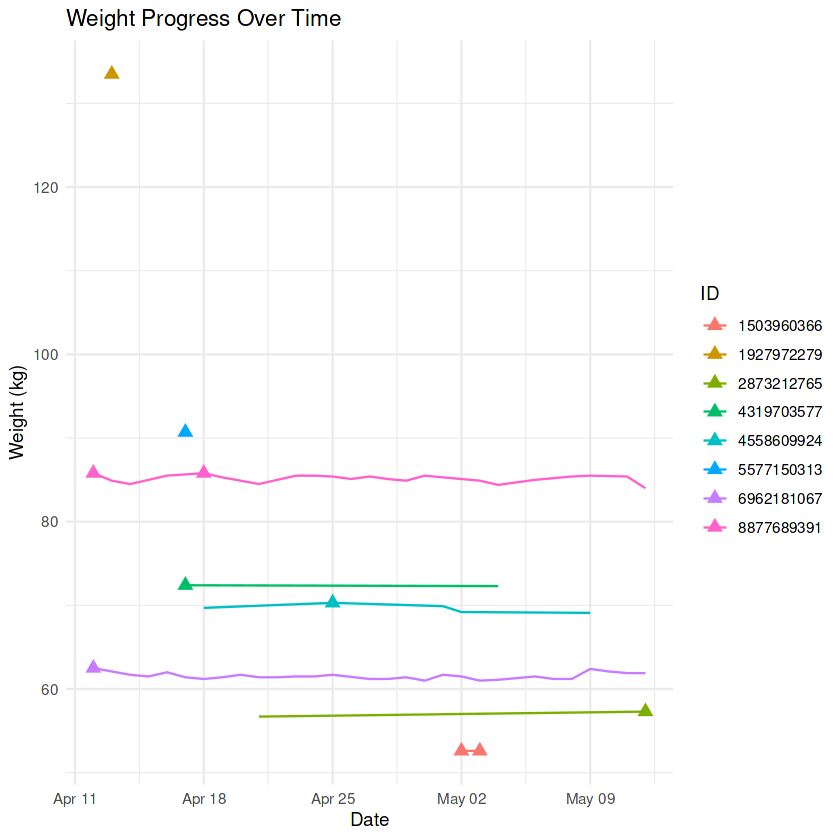

In [24]:
 # Create a line plot to visualize weight progress for each individual
 ggplot(weight_data, aes(x = Date, y = WeightKg, group = Id, color = as.factor(Id))) +
   geom_line() +  # Add lines
   geom_point(data = weight_data %>% group_by(Id) %>% filter(WeightKg == max(WeightKg)),  # Add points at peaks
              aes(x = Date, y = WeightKg, group = Id, color = as.factor(Id)),
              size = 3,
              shape = 17) +
   labs(title = "Weight Progress Over Time",
        x = "Date",
        y = "Weight (kg)",
        color = "ID") +  # Update legend title
   theme_minimal()